<a href="https://colab.research.google.com/github/Yaswanthyarra/LGMVIP--DataScience/blob/main/NNforHandwritingRecognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Handwritten equation solver using NN
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import unique , argmax 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import pandas as pd


In [ ]:
dataset = tf.keras.datasets.mnist

(x_trn, y_trn), (x_tst, y_tst) = dataset.load_data()

In [ ]:
#preprocessing
x_trn =x_trn.reshape((x_trn.shape[0] , x_trn.shape[1],x_trn.shape[2],1))
x_tst =x_tst.reshape((x_tst.shape[0] , x_tst.shape[1],x_tst.shape[2],1))

In [ ]:
x_trn=x_trn.astype('float32')/255.0
x_tst=x_tst.astype('float32')/255.0

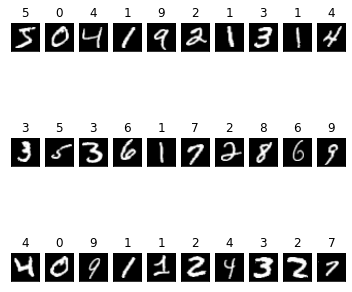

In [ ]:
#visually inspecting the dataset and verifying that the images and labels are loaded correctly.
fignum=plt.figure(figsize=(6,6))
for ind in range(30):
    ax =fignum.add_subplot(3,10,ind+1 ,xticks=[] ,yticks=[])
    ax.imshow(np.squeeze(x_trn[ind]), cmap='gray')
    ax.set_title(y_trn[ind])

In [ ]:

#constructing the model
mnist_model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

In [ ]:

mnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


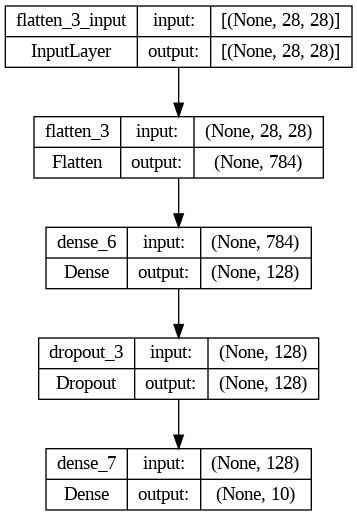

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(mnist_model, 'mnist_model.jpg', show_shapes=True)

In [ ]:
lossf = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
mnist_model.compile(optimizer='adam',loss=lossf,metrics=['accuracy'])

In [ ]:
#Training the model 
history=mnist_model.fit(x_trn, y_trn, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6514 - accuracy: 0.7926
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6485 - accuracy: 0.7917
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6470 - accuracy: 0.7944
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6461 - accuracy: 0.7920
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6464 - accuracy: 0.7936
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6423 - accuracy: 0.7959
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6419 - accuracy: 0.7970
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6383 - accuracy: 0.7982
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6457 - accuracy: 0.7940
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - l

<AxesSubplot:>

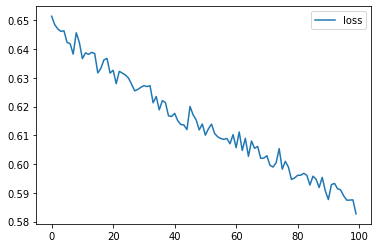

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss']].plot()


In [ ]:
mnist_model.evaluate(x_tst, y_tst, verbose=5)

[0.3958885073661804, 0.8931000232696533]

In [ ]:
probability_model = tf.keras.Sequential([ mnist_model,tf.keras.layers.Softmax() ])
probability_model(x_tst[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.2463355e-07, 1.4228651e-05, 7.2573835e-05, 8.5078133e-04,
        9.8459818e-09, 5.2382334e-06, 1.4927637e-12, 9.9201411e-01,
        2.3399612e-06, 7.0404769e-03],
       [8.6666674e-05, 1.3511380e-02, 8.4444803e-01, 1.0950931e-01,
        6.0337157e-10, 3.7576791e-03, 5.3014333e-04, 1.1087157e-05,
        2.8145703e-02, 2.0252953e-09],
       [3.2373030e-08, 9.7037357e-01, 3.6435034e-03, 3.1022264e-03,
        1.4985914e-04, 4.7363111e-04, 5.6234225e-05, 1.9208729e-02,
        1.9745410e-03, 1.0177242e-03],
       [9.5014513e-01, 1.1594209e-06, 2.3971146e-03, 4.3066503e-03,
        3.8000667e-07, 3.9305650e-02, 1.7280783e-05, 1.5999858e-03,
        1.6774520e-03, 5.4921128e-04],
       [1.7955323e-04, 3.1947999e-03, 6.4547043e-03, 2.2601341e-04,
        7.9400998e-01, 9.4232085e-04, 3.7102164e-03, 2.0377563e-02,
        1.4026654e-02, 1.5687820e-01]], dtype=float32)>

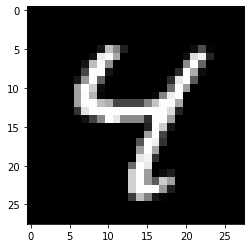

In [ ]:
img = x_tst[6]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [ ]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= mnist_model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 86ms/step
predicted : 4
